<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/test916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤넘버 그래프

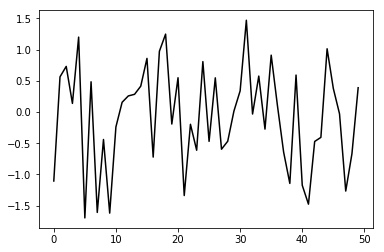

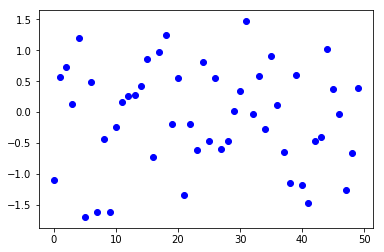

(array([1., 2., 0., 1., 0., 1., 1., 0., 2., 1., 0., 0., 0., 0., 0., 1., 2.,
        2., 0., 4., 1., 0., 1., 3., 0., 0., 2., 1., 2., 1., 1., 1., 3., 1.,
        1., 4., 1., 0., 1., 1., 1., 1., 2., 0., 0., 1., 1., 0., 0., 1.]),
 array([-1.6958234 , -1.63247625, -1.56912911, -1.50578196, -1.44243481,
        -1.37908766, -1.31574051, -1.25239336, -1.18904622, -1.12569907,
        -1.06235192, -0.99900477, -0.93565762, -0.87231047, -0.80896333,
        -0.74561618, -0.68226903, -0.61892188, -0.55557473, -0.49222759,
        -0.42888044, -0.36553329, -0.30218614, -0.23883899, -0.17549184,
        -0.1121447 , -0.04879755,  0.0145496 ,  0.07789675,  0.1412439 ,
         0.20459105,  0.26793819,  0.33128534,  0.39463249,  0.45797964,
         0.52132679,  0.58467393,  0.64802108,  0.71136823,  0.77471538,
         0.83806253,  0.90140968,  0.96475682,  1.02810397,  1.09145112,
         1.15479827,  1.21814542,  1.28149257,  1.34483971,  1.40818686,
         1.47153401]),
 <a list of 50 Patch 

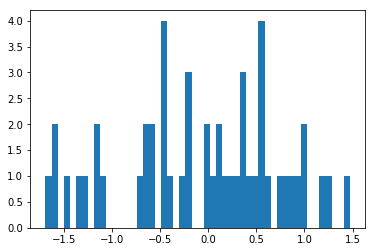

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n = 50
y = np.random.randn(n)
x = range(n)
plt.plot(x, y, c='k')
y.mean()
plt.show()
plt.scatter(x, y, c='b')
plt.show()
plt.hist(y, bins=50)


공식 y = 3*x1 + 4*x2 + 5공식에서

y의 W1(3), W2(4), b(5)값을 찿는것

3, 4, 5는 임의의 제공값임

Ir : Leaning rate(계산시간을 의미)

w값이 많아질수록 값은 작아짐 실행으로 찾는다 어려움이 많다

In [4]:
# x1 = np.random.rand(3)
# x2 = np.random.rand(3)

# y = x1*3 + x2*4 + 5

# w1 = np.random.rand(1)
# w2 = np.random.rand(1)

# b = np.random.rand()
# ir = 1

# for i in range(500):
#   y_pred = w1*x1 + w2*x2 + b
#   e = y_pred - y
#   w1 = w1 - ir*(e*x1).mean()
#   w2 = w2 - ir*(e*x2).mean()

#   b = b - ir*e.mean()
#   print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 


i= 0 w1= [4.50014788] w2= [3.80185101] b= 7.671173152720187 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= -7.443035951283911
i= 1 w1= [2.5511169] w2= [2.52163764] b= 4.23141676105037 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= 3.4397563916698175
i= 2 w1= [3.46342537] w2= [3.13814585] b= 5.790584983478341 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= -1.5591682224279717
i= 3 w1= [3.06104382] w2= [2.88265047] b= 5.0544712416006705 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= 0.7361137418776705
i= 4 w1= [3.26196358] w2= [3.02680389] b= 5.373153770033634 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= -0.3186825284329628
i= 5 w1= [3.1853015] w2= [2.98658506] b= 5.207983127685971 x1= [0.48533798 0.74285752 0.45328938] x2= [0.2907079  0.58903731 0.21400884] error= 0.16517064234766288
i= 6 w1= [3.235

## gradiant descent구현해보기
   처음에 준비할일 : x, y준비하기

In [0]:
# n = 100
# x1 = np.random.rand(n)
# x2 = np.random.rand(n)
# y = x1*3 + x2*0.5 + 1

# x = np.vstack((x1,x2)).T
# x[:5]

# # from sklearn.linear_model import SGDRegressor
# # model = SGDRegressor() # (1) 모델 선택
# # model.fit(x, y) #(2) 모델 학습
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])
# # 실행않됨

# from sklearn.linear_model import LinearRegression
# model = LinearRegression() # (1) 모델 선택
# model.fit(x, y) #(2) 모델 학습 # 실행가능
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])

# # from sklearn.tree import DecisionTreeRegressor
# # model = DecisionTreeRegressor() # (1) 모델 선택
# # model.fit(x, y) #(2) 모델 학습
# model.coef_, model.intercept_
# model.predict([[0.6, 1], [0.5, 0.5]])

In [0]:
n = 10
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = x1*3 + x2*0.5 + 1

In [6]:
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

In [0]:
x = np.vstack((x1,x2)).T

In [8]:
x.shape

(100, 2)

In [0]:
x

In [45]:
x[:5]

array([[0.36092343, 0.54534039],
       [0.18842856, 0.48921749],
       [0.95628762, 0.66656744],
       [0.68516808, 0.72905137],
       [0.59794126, 0.71582037]])

In [80]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor() # (1) 모델 선택
model.fit(x, y) #(2) 모델 학습
# 실행않됨
# n = 20000이상시 수렴함
# n = 작을경우 수렴하나 오차가 큼

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [81]:
model.coef_, model.intercept_

(array([1.52473935, 0.38425287]), array([1.84682095]))

In [82]:
 print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 

i= 499 w1= [3.52622776] w2= [3.57901942] b= 4.858522913743235 x1= [0.29572291 0.84065795 0.93379107 0.10567681 0.95264107 0.82522136
 0.90429127 0.14507088 0.61458949 0.41607253] x2= [0.78006886 0.23341316 0.21925036 0.58674048 0.33988964 0.12351913
 0.08271022 0.40761565 0.08086621 0.10774278] error= -1.215316261641656e-05


In [68]:
model.predict([[0.6, 1], [0.5, 0.5]])

array([3.23709926, 2.74017596])

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 선택
model.fit(x, y) #(2) 모델 학습
# 실행가능

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model.coef_, model.intercept_

(array([3. , 0.5]), 0.9999999999999996)

In [77]:
 print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 

i= 499 w1= [3.52622776] w2= [3.57901942] b= 4.858522913743235 x1= [0.06136795 0.68391691 0.28143569 0.40120489 0.48244446 0.00887418
 0.01319006 0.59331183 0.21005708 0.5576648 ] x2= [0.13057936 0.48286307 0.27355299 0.61774149 0.40388596 0.00969517
 0.07925633 0.74050147 0.37658382 0.01823774] error= -1.215316261641656e-05


In [63]:
model.predict([[0.6, 1], [0.5, 0.5]])

array([3.3 , 2.75])

In [0]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor() # (1) 모델 선택
# model.fit(x, y) #Deci(2) 모델 학습
# # 실행않됨

In [0]:
model.coef_, model.intercept_

In [0]:
 print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 

In [0]:
model.predict([[0.6, 1], [0.5, 0.5]])